In [106]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import bernoulli
import statsmodels
import statsmodels.sandbox.stats.multicomp

%matplotlib inline

In [107]:
#ЦПТ
def get_95_interval(data, sigma=None):
    mean = data.mean()
    if sigma is None:
        sigma = data.std()
    err = sigma * 1.96 / np.sqrt(len(data))
    return mean - err, mean + err

In [128]:
hits = 0.
count = 0.
true_mean = 0.5

for _ in range(10000):
    data = bernoulli.rvs(true_mean,0, size=10)
    lower_bound, upper_bound = get_95_interval(data)
    count += 1
    if lower_bound <= true_mean <= upper_bound:
        hits += 1
        
print(hits / count)

0.8938


In [131]:
#Bootstap для Бернулли
def my_bootstrap(data_fst, data_snd, iters=1000, plot=True):
    values = []
    for _ in range(iters):
        values.append(
            np.random.choice(data_fst, replace=True, size=len(data_fst)).mean()
            -
            np.random.choice(data_snd, replace=True, size=len(data_snd)).mean()
        )
        
    if plot:
        plt.hist(values, bins=30)
        plt.show()
        
    return np.percentile(values, [2.5, 97.5])

0.554787999668


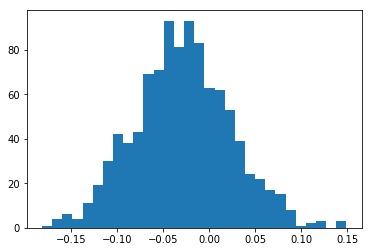

[-0.127025  0.076   ]


In [150]:
data_fst = bernoulli.rvs(0.5, 1, size=1000)
data_snd = bernoulli.rvs(0.5, 1, size=100)

print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_bootstrap(data_fst, data_snd, iters=1000, plot=True))

In [ ]:
#Корректность
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.random.normal(10, 10, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    lower, upper = my_bootstrap(data_fst, data_snd, plot=False, iters=1000)
    count += 1
    if not (lower < 0 < upper):
        hits += 1

print(hits / count)

In [ ]:
#Корректность c выбросами
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(10, 10, size=1000),[-1000000, -1000000])
    data_snd = np.random.normal(10, 1, size=100)

    lower, upper = my_bootstrap(data_fst, data_snd, plot=False, iters=1000)
    count += 1
    if not (lower < 0 < upper):
        hits += 1

print(hits / count)

In [ ]:
#Мощность критерия
pvalues = []
for _ in range(10000):
    data_fst = bernoulli.rvs(0.5, 10, size=100)
    data_snd = bernoulli.rvs(0.5, 1, size=100)
    pvalues.append(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
    
print((np.array(pvalues) < 0.05).mean())
plt.hist(pvalues)
plt.show()

In [ ]:
#Мощность критерия с выбросами
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(11, 10, size=1000),[-1000000, -1000000])
    data_snd = np.random.normal(10, 1, size=100)

    lower, upper = my_bootstrap(data_fst, data_snd, plot=False, iters=1000)
    count += 1
    if not (lower < 0 < upper):
        hits += 1

print(hits / count)

In [ ]:
#Перестановочные тесты
def my_test(data_fst, data_snd, iters=1000, plot=True):
    data = np.array(list(data_fst) + list(data_snd))
    size = len(data)
    values = []
    fst_ratio = len(data_fst) * 1. / size
    for _ in range(iters):
        mask = (bernoulli.rvs(0.5, size=size) < fst_ratio)
        values.append(data[mask].mean() - data[~mask].mean())
        
    if plot:
        plt.hist(values, bins=30)
        plt.show()
        
    return (np.abs(values) > np.abs(data_fst.mean() - data_snd.mean())).mean()

In [ ]:
data_fst = bernoulli.rvs(0.5, 0, size=100)
data_snd = bernoulli.rvs(0.5, 0, size=100)

In [ ]:
print(scipy.stats.ttest_ind(data_fst, data_snd).pvalue)
print(my_test(data_fst, data_snd, iters=10))
print(my_test(data_fst, data_snd, iters=100))
print(my_test(data_fst, data_snd, iters=1000))
print(my_test(data_fst, data_snd, iters=10000))

In [ ]:
#Корректность
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.random.normal(10, 1, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

In [ ]:
#Корректность с выбросами
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(10, 1, size=1000),[-1000000, -1000000])
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

In [ ]:
#Мощность
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.random.normal(11, 1, size=1000)
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)

In [ ]:
#Мощность с выбросами
hits = 0.
count = 0.

for _ in range(1000):
    data_fst = np.append(np.random.normal(11, 1, size=1000),[-1000000, -1000000])
    data_snd = np.random.normal(10, 1, size=100)

    count += 1
    if my_test(data_fst, data_snd, plot=False, iters=1000) < 0.05:
        hits += 1

print(hits / count)